### Bài toán mở đầu

Hãy phân loại hai loại mail <span>mail</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import gradient_decent # modulo dùng để update trọng số



<center>
<h4>  Neurol Network one - one layer </h4>
<img src="nn_model_linear_regression_simple.png" style="width:400px; margin-left:auto;margin-right:auto">
</center>


## Dataset

In [2]:
m = 1000 # Độ dài tập train

X, Y = make_regression(n_samples = m, n_features = 1,noise=20,random_state=1) # Xây dựng data gồm 1 feature, m mẫu

# Đưa về thành vector có 1 hàng
X = X.reshape((1,m))
Y = Y.reshape((1,m))

print(X)
print(Y)

[[-1.06787658e+00 -2.91594596e-01  5.08077548e-02  6.21803504e-01
  -5.45774168e-01  1.55501599e+00 -2.09752935e-01  1.78975468e+00
  -7.67803746e-01  1.47073986e+00 -2.86384915e-01 -3.64538050e-01
   4.03491642e-01  3.37220938e-01  8.64644065e-02 -1.67419581e+00
  -9.24323185e-02  5.20576337e-01  1.46089238e+00 -9.15424368e-01
  -1.61198320e-01  1.57546791e+00  7.44884536e-01  1.04499441e+00
  -2.79099641e+00 -7.47158294e-01 -1.11711069e+00 -1.09033833e+00
   8.59870972e-01  1.90915485e-01 -3.31283170e-01 -4.23478297e-01
   3.19656942e-01 -1.94504696e+00 -8.80577600e-01  8.38634747e-01
  -1.56450785e+00  8.16043684e-01 -7.33271604e-01  6.40985866e-01
  -6.74100249e-02 -2.30153870e+00 -8.57496825e-01 -6.04602969e-01
  -6.20000844e-01 -1.82420406e-01 -8.98683193e-01  1.19891788e+00
   2.10025514e+00 -1.72428208e-01  5.02740882e-01  3.85602292e-01
  -3.94689681e-01  1.00796648e+00  1.64665066e-01  3.93787731e-01
   5.85910431e-01 -2.18733459e-01 -7.22391905e-01 -2.22328143e-01
  -1.98937

Trực quan hóa

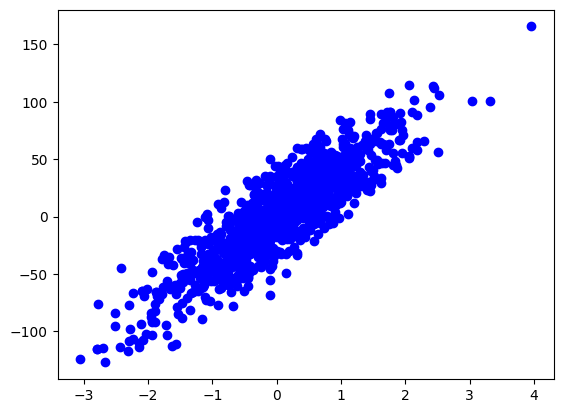

In [3]:
plt.scatter(X,Y,c="blue")

## Xác định cấu trúc Neurol Network

In [4]:
def layer_size(X,Y):
    n_x = X.shape[0] # số input_layer
    n_y = Y.shape[0] # số output_layer
    return (n_x,n_y)

In [5]:
(n_x,n_y) = layer_size(X,Y)
print(n_x)
print(n_y)

1
1


In [6]:
# Khởi tạo random các trọng số ban đầu
def random_parameters(n_x,n_y):
    W = np.random.randn(n_x,n_y) * 0.1 # tạo mảng trọng số ngẫu nhiên có kích thước n_x,n_y
    b = np.zeros((n_y,1)) # Khởi tạo mảng bias tương ứng với số output_layer

    parameters = {"W": W,
                 "b": b}
    return parameters

In [7]:
parameters = random_parameters(n_x,n_y)
print(parameters["W"])
print(parameters["b"])

[[-0.02736363]]
[[0.]]


## Train - Processing

\begin{align}
Z &=  w X + b\\
\hat{Y} &= Z,
\end{align}

In [8]:
# Hàm tính toán output_layer với mỗi bộ trọng số trong vòng lặp
def pre_loop(X,parameters):
    W = parameters["W"]
    b = parameters["b"]

    Y_hat = W*X + b

    return Y_hat


In [9]:
Y_hat = pre_loop(X,parameters)
print(Y_hat)

[[ 2.92209834e-02  7.97908769e-03 -1.39028479e-03 -1.70148033e-02
   1.49343644e-02 -4.25508880e-02  5.73960249e-03 -4.89741915e-02
   2.10099004e-02 -4.02447867e-02  7.83653191e-03  9.97508565e-03
  -1.10409975e-02 -9.22759022e-03 -2.36598035e-03  4.58120808e-02
   2.52928410e-03 -1.42448602e-02 -3.99753239e-02  2.50493371e-02
   4.41097176e-03 -4.31105267e-02 -2.03827476e-02 -2.85948442e-02
   7.63718032e-02  2.04449658e-02  3.05682078e-02  2.98356187e-02
  -2.35291943e-02 -5.22414138e-03  9.06511130e-03  1.15879050e-02
  -8.74697546e-03  5.32235524e-02  2.40958029e-02 -2.29480940e-02
   4.28106198e-02 -2.23299204e-02  2.00649755e-02 -1.75397024e-02
   1.84458323e-03  6.29784618e-02  2.34642290e-02  1.65441342e-02
   1.69654760e-02  4.99168517e-03  2.45912377e-02 -3.28067497e-02
  -5.74706122e-02  4.71826231e-03 -1.37568173e-02 -1.05514799e-02
   1.08001438e-02 -2.75816254e-02 -4.50583454e-03 -1.07754632e-02
  -1.60326384e-02  5.98534224e-03  1.97672675e-02  6.08370585e-03
   5.44365

## Hàm mất mát
$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [10]:
def cost(Y_hat,Y):
    m = Y.shape[0] # số lượng mẫu

    cost = np.sum((Y_hat - Y)**2) / (2*m) # Tính loss

    return cost

In [11]:
print(cost(Y_hat,Y))

908223.9401910921


## Build - model

In [12]:
def nn_model(X,Y,interation):
    # lấy size
    n_x = layer_size(X,Y)[0]
    n_y = layer_size(X,Y)[1]
    update_W = []
    update_b = []
    update_loss = []
    # Khởi tạo giá trị ban đầu
    parameters = random_parameters(n_x,n_y)

    # loop
    for i in range(0, interation):
        # Tính giá trị ứng với trọng số của lần i
        Y_hat = parameters["W"]*X + parameters["b"] 
        
        # Tính loss
        loss = cost(Y_hat,Y) 
        print(f"Loss của lần {i + 1} : {loss}")

        # update trọng số
        parameters = gradient_decent.train_nn(parameters,Y_hat,X,Y) # Hàm dùng để gradient decent
        update_W.append(np.asarray(parameters["W"][0]))
        update_b.append(np.asarray(parameters["b"][0]))
        update_loss.append(np.asarray([loss]))
        
    return parameters,np.asarray(update_W),np.asarray(update_b),np.asarray(update_loss)

In [13]:
parameters,update_W,update_b,update_loss = nn_model(X,Y,1000)
W = parameters['W']
b = parameters["b"]
print(W)
print(b)
print(update_W)


Loss của lần 1 : 907316.8872348819
Loss của lần 2 : 820772.8782532117
Loss của lần 3 : 761627.7773662249
Loss của lần 4 : 724388.2762603192
Loss của lần 5 : 704895.4946370252
Loss của lần 6 : 700027.7850655622
Loss của lần 7 : 707472.3017757947
Loss của lần 8 : 725549.6911794059
Loss của lần 9 : 753079.8470311007
Loss của lần 10 : 789279.4393125437
Loss của lần 11 : 833684.0604911054
Loss của lần 12 : 886089.4802927971
Loss của lần 13 : 946507.7720162971
Loss của lần 14 : 1015135.055703449
Loss của lần 15 : 1092328.3625178565
Loss của lần 16 : 1178589.711655612
Loss của lần 17 : 1274555.9455180939
Loss của lần 18 : 1380993.2211973523
Loss của lần 19 : 1498795.3300880068
Loss của lần 20 : 1628985.2308126409
Loss của lần 21 : 1772719.3476637905
Loss của lần 22 : 1931294.3182718626
Loss của lần 23 : 2106155.9785966086
Loss của lần 24 : 2298910.457110502
Loss của lần 25 : 2511337.3182400684
Loss của lần 26 : 2745404.7516802717
Loss của lần 27 : 3003286.852161281
Loss của lần 28 : 3287383.0

In [14]:
print(update_loss.shape)

(1000, 1)


## Trực quan hóa

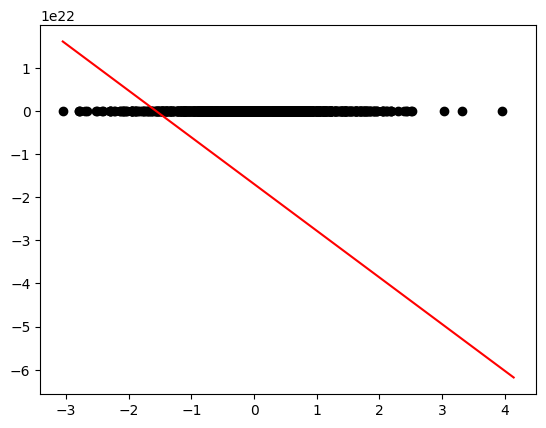

In [15]:

fig,ax = plt.subplots()
plt.scatter(X,Y,color =  "black")

# vẽ đường thẳng
line = np.arange(np.min(X[0,:]),np.max(X[0,:]) * 1.05, 0.1)
ax.plot(line,W[0,0]*line + b[0,0],"r")

plt.plot()
plt.show()

In [16]:
update_W

array([[ 7.37990270e+01],
       [ 5.00856994e+00],
       [ 6.95944346e+01],
       [ 8.49487884e+00],
       [ 6.67491786e+01],
       [ 1.07664045e+01],
       [ 6.49927874e+01],
       [ 1.20585666e+01],
       [ 6.41207309e+01],
       [ 1.25486557e+01],
       [ 6.39797577e+01],
       [ 1.23686893e+01],
       [ 6.44566267e+01],
       [ 1.16152843e+01],
       [ 6.54694619e+01],
       [ 1.03572229e+01],
       [ 6.69611351e+01],
       [ 8.64123530e+00],
       [ 6.88942188e+01],
       [ 6.49640059e+00],
       [ 7.12471538e+01],
       [ 3.93747632e+00],
       [ 7.40113628e+01],
       [ 9.67395188e-01],
       [ 7.71890981e+01],
       [-2.42088828e+00],
       [ 8.07918657e+01],
       [-6.24306018e+00],
       [ 8.48392992e+01],
       [-1.05225113e+01],
       [ 8.93583933e+01],
       [-1.52897209e+01],
       [ 9.43830226e+01],
       [-2.05818971e+01],
       [ 9.99536924e+01],
       [-2.64428282e+01],
       [ 1.06117480e+02],
       [-3.29229081e+01],
       [ 1.1

In [17]:
update_b

array([[ 4.13197064e+00],
       [-5.72886258e+00],
       [ 9.47182659e+00],
       [-1.07423372e+01],
       [ 1.42146767e+01],
       [-1.52643245e+01],
       [ 1.85603369e+01],
       [-1.94736449e+01],
       [ 2.26693532e+01],
       [-2.35149679e+01],
       [ 2.66726331e+01],
       [-2.75073047e+01],
       [ 3.06789398e+01],
       [-3.15506284e+01],
       [ 3.47807465e+01],
       [-3.57310564e+01],
       [ 3.90588314e+01],
       [-4.01249323e+01],
       [ 4.35859109e+01],
       [-4.48020673e+01],
       [ 4.84295385e+01],
       [-4.98283415e+01],
       [ 5.36544491e+01],
       [-5.52678235e+01],
       [ 5.93244836e+01],
       [-6.11845296e+01],
       [ 6.55042050e+01],
       [-6.76439157e+01],
       [ 7.22602869e+01],
       [-7.47141795e+01],
       [ 7.96627429e+01],
       [-8.24674299e+01],
       [ 8.77860478e+01],
       [-9.09807714e+01],
       [ 9.67101942e+01],
       [-1.00337341e+02],
       [ 1.06521718e+02],
       [-1.10627328e+02],
       [ 1.1

In [18]:
update_loss

array([[9.07316887e+05],
       [8.20772878e+05],
       [7.61627777e+05],
       [7.24388276e+05],
       [7.04895495e+05],
       [7.00027785e+05],
       [7.07472302e+05],
       [7.25549691e+05],
       [7.53079847e+05],
       [7.89279439e+05],
       [8.33684060e+05],
       [8.86089480e+05],
       [9.46507772e+05],
       [1.01513506e+06],
       [1.09232836e+06],
       [1.17858971e+06],
       [1.27455595e+06],
       [1.38099322e+06],
       [1.49879533e+06],
       [1.62898523e+06],
       [1.77271935e+06],
       [1.93129432e+06],
       [2.10615598e+06],
       [2.29891046e+06],
       [2.51133732e+06],
       [2.74540475e+06],
       [3.00328685e+06],
       [3.28738308e+06],
       [3.60034000e+06],
       [3.94507553e+06],
       [4.32480578e+06],
       [4.74307482e+06],
       [5.20378752e+06],
       [5.71124589e+06],
       [6.27018911e+06],
       [6.88583769e+06],
       [7.56394218e+06],
       [8.31083682e+06],
       [9.13349865e+06],
       [1.00396127e+07],


Text(0.5, 0.92, 'surface')

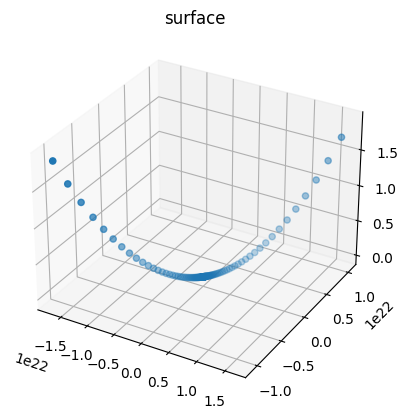

In [19]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection='3d')
ax.scatter(update_b, update_W, update_loss)
ax.set_title('surface')